# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [29]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [83]:
group_b = data[data.race=='b']
group_w = data[data.race=='w']

p_b_called = np.mean(group_b.call)
p_w_called = np.mean(group_w.call)

count_b_called = sum(group_b.call)
count_w_called = sum(group_w.call)

count_b = len(group_b)
count_w = len(group_w)

print('p(''b'' is called):', p_b_called, '(called =', count_b_called, ', count =', count_b, ')')
print('p(''w'' is called):', p_w_called, '(called =', count_w_called, ', count =', count_w, ')')

p_diff_abs = p_w_called - p_b_called
p_diff_rel = ( p_diff_abs / p_b_called ) * 100
print('Absolute Difference in p: ', p_diff_abs)
print('Relative % Difference in p: ', p_diff_rel, '%')

p(b is called): 0.0644763857126236 (called = 157.0 , count = 2435 )
p(w is called): 0.09650924056768417 (called = 235.0 , count = 2435 )
Absolute Difference in p:  0.03203285485506058
Relative % Difference in p:  49.681529913654856 %


#1) A two-sample test will be applicable here, as we will have two samples, one for white-sounding names and the other of black-sounding names. In particular, we will utilize a one-tail test to see if there is racial discrimination.

The dataset is sufficiently large enough for the Central Limit Theorem to apply here.

#2) The null hypothesis is that the callback rates for white-sounding names is not higher than that for black-sounding names (in other words, such differences can be explained by random chance). The alternate hypothesis is that there is a meaningful difference in callback rates due to the nature of a person's name (white-sounding vs. black-sounding).

Margin of error: 0.0123547822087
Confidence interval: [ 0.0196780726464  0.0443876370637 ]


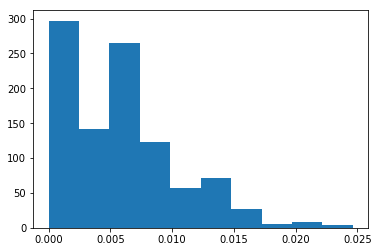

p-value of differences of means >= absolute difference in dataset: 0.0


In [315]:
# Answer for problem 3
diff_of_means = np.mean(group_w.call) - np.mean(group_b.call)
group_w_minus_b = group_w.reset_index(drop=True).call - group_b.reset_index(drop=True).call

std_error = stats.sem(group_w_minus_b)
z_critical = stats.norm.ppf(q = 0.975) # for 95% confidence interval, use q=0.975

moe = std_error * z_critical
ci_lower = diff_of_means - moe
ci_upper = diff_of_means + moe

print('Margin of error:', moe)
print('Confidence interval: [', ci_lower ,'', ci_upper, ']')

def TestStatistic(data):
    group_b, group_w = data
    test_stat = abs(group_w.mean() - group_b.mean())
    return test_stat

def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

n, m = len(group_b.call), len(group_w.call)
pool = np.hstack((group_b.call,group_w.call))

test_stat_data = np.array([TestStatistic(RunModel()) for i in range(1000)])
p_value = sum(test_stat_data >= p_diff_abs) / len(test_stat_data)
plt.hist(test_stat_data)
plt.show()
print('p-value of differences of means >= absolute difference in dataset:', p_value)

#4)

#5)